In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score
import xgboost
%matplotlib inline

In [2]:
#Lecture des données
train_data = pd.read_csv('dataset/train.csv', sep=',',low_memory=False)
store_data = pd.read_csv('dataset/store.csv', sep=',',low_memory=False)
test_data = pd.read_csv('dataset/test.csv', sep=',',low_memory=False)

In [24]:
#Traitement et nettoyage des données

"""
1er test avec suppression des lignes avec données manquantes
"""
# Jointure des deux fichiers pour elaboration des modèles
join_train = train_data.join(store_data.set_index('Store'),on='Store')
le = preprocessing.LabelEncoder()
newdata = le.fit_transform(join_train['Date'])
join_train['Date']=newdata
join_train = join_train.dropna()

#Transformation des données en 1-Hot Vector
join_train = pd.get_dummies(join_train)


#Même chose pour les données de test
# Jointure des deux fichiers pour elaboration des modèles
join_test = test_data.join(store_data.set_index('Store'),on='Store')
le = preprocessing.LabelEncoder()
newdata = le.fit_transform(join_test['Date'])
join_test['Date']=newdata
join_test = join_test.dropna()

#Transformation des données en 1-Hot Vector
join_test = pd.get_dummies(join_test)
#Suppression de la colonne Id
del join_test['Id']
join_test.head(5)

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StateHoliday_0,StateHoliday_a,StoreType_a,StoreType_c,StoreType_d,Assortment_a,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
1,3,4,47,1.0,1,0,14130.0,12.0,2006.0,1,...,1,0,1,0,0,1,0,0,1,0
6,11,4,47,1.0,1,0,960.0,11.0,2011.0,1,...,1,0,1,0,0,0,1,0,1,0
9,14,4,47,1.0,1,0,1300.0,3.0,2014.0,1,...,1,0,1,0,0,1,0,0,1,0
10,15,4,47,1.0,1,0,4110.0,3.0,2010.0,1,...,1,0,0,0,1,0,1,0,1,0
13,20,4,47,1.0,1,0,2340.0,5.0,2009.0,1,...,1,0,0,0,1,1,0,0,1,0


In [26]:

#Définition des prédicteurs pour les modèles
predicteurs=['Date','DayOfWeek','Open','Promo',
           'SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
predictants=['Sales']

#Définition des données d'entrainement et de validation
y = join_train[(predictants)].values
X = join_train[(predicteurs)].values
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.1)
join_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_c,StoreType_d,Assortment_a,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
1,2,5,941,6064,625,1,1,1,570.0,11.0,...,0,0,1,0,0,1,0,0,1,0
2,3,5,941,8314,821,1,1,1,14130.0,12.0,...,0,0,1,0,0,1,0,0,1,0
10,11,5,941,10457,1236,1,1,1,960.0,11.0,...,0,0,1,0,0,0,1,0,1,0
13,14,5,941,6544,710,1,1,1,1300.0,3.0,...,0,0,1,0,0,1,0,0,1,0
14,15,5,941,9191,766,1,1,1,4110.0,3.0,...,0,0,0,0,1,0,1,0,1,0


In [5]:
#Modèle linéaire
reg_lin = linear_model.LinearRegression()
reg_res = reg_lin.fit(X_train,y_train)

reg_lin_scorev=reg_lin.score(X_valid,y_valid)
reg_lin_scoret=reg_lin.score(X_train,y_train)
print("Score de Validation = ",reg_lin_scorev," Score d'entrainement = ",reg_lin_scoret)

Score de Validation =  0.5938710199415311  Score d'entrainement =  0.5967360877905707


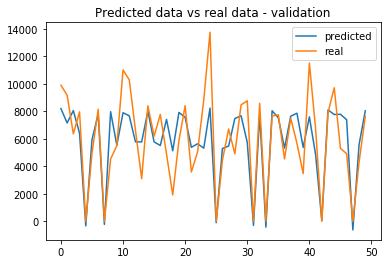

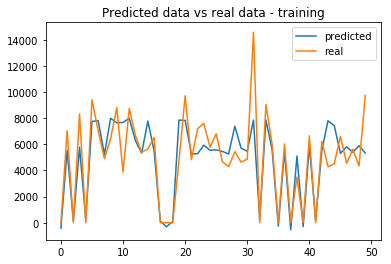

In [6]:
toprint = 50
y_predictv = reg_lin.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=reg_lin.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()

In [18]:
#Random Forest
regrf = RandomForestRegressor(max_depth=10,n_estimators=20)
regrf.fit(X_train,np.ravel(y_train))

regrf_scorev=regrf.score(X_valid,y_valid)
regrf_scoret=regrf.score(X_train,y_train)
print("Score de Validation = ",regrf_scorev," Score d'entrainement = ",regrf_scoret)

Score de Validation =  0.7463490723310366  Score d'entrainement =  0.7489439213529399


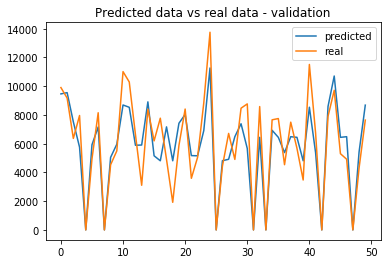

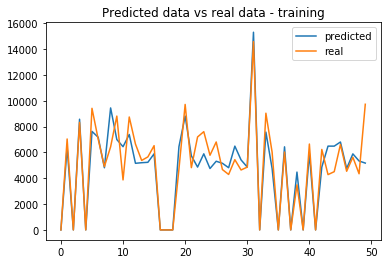

In [19]:
y_predictv = regrf.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=regrf.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()


In [20]:
# MultiLayer Perceptron
nn=MLPRegressor(hidden_layer_sizes=(20,), activation='relu',solver='adam')
nn.fit(X_train,np.ravel(y_train))

nn_scorev=nn.score(X_valid,y_valid)
nn_scoret=nn.score(X_train,y_train)
print("Score de Validation = ",nn_scorev," Score d'entrainement = ",nn_scoret)

Score de Validation =  0.6121184951646346  Score d'entrainement =  0.6133221406449144


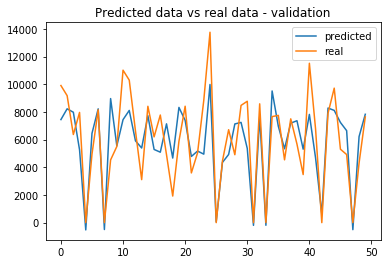

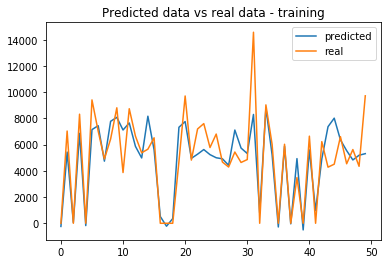

In [10]:
y_predictv = nn.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=nn.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()


In [12]:
#XgBoost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10)
xgb.fit(X_train,y_train)

xgb_scorev=xgb.score(X_valid,y_valid)
xgb_scoret=xgb.score(X_train,y_train)
print("Score de Validation = ",xgb_scorev," Score d'entrainement = ",xgb_scoret)

Score de Validation =  0.93798789732712  Score d'entrainement =  0.9468554003390102


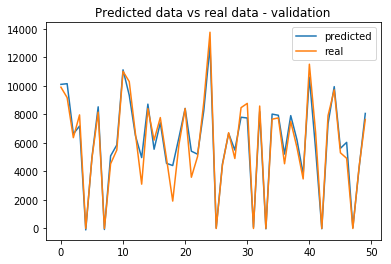

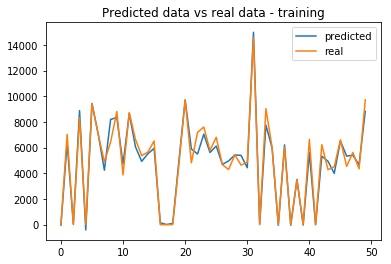

In [21]:
y_predictv = xgb.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=xgb.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()

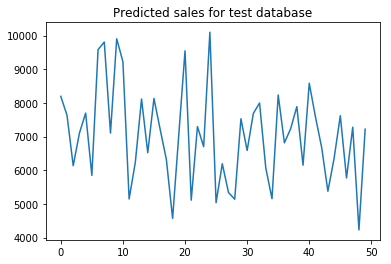

In [29]:
#Prédictions des données de tests avec le meilleur model
ytest_predicted = xgb.predict(join_test[(predicteurs)].values)

plt.plot(ytest_predicted[0:toprint])
plt.title("Predicted sales for test database")
plt.show()